# UV-VIS Spectroscopy Analysis

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\UV-VIS\\221027B"
file_name_T = "271022Bsel T.txt"
file_name_R = "271022Bsel DR.txt"
file_title = file_name_T.replace(' T.txt', '')
t = 1074.22*1E-7 # film thickness in cm

# Read the data from the text file, skipping the first 12 lines
data_T = np.loadtxt(os.path.join(folder_path, file_name_T), delimiter=',', skiprows=2)
data_R = np.loadtxt(os.path.join(folder_path, file_name_R), delimiter=',', skiprows=2)

df_T = pd.read_csv(os.path.join(folder_path, file_name_T), sep=",", skiprows=2, header=None, names=["Wavelength (nm)", "T (%)"])
df_R = pd.read_csv(os.path.join(folder_path, file_name_R), sep=",", skiprows=2, header=None, names=["Wavelength (nm)", "R (%)"])
df_data = df_T.merge(df_R, on='Wavelength (nm)') # assumes same wavelength scale 

# Extract data
df_data['Absorptance (%)'] = 100 - (df_T['T (%)'] + df_R['R (%)']) # Absorptance
df_data['Absorbance (%)'] = np.log10(100/df_T['T (%)']) # Absorbance
WL_T = data_T[:,0] # wavelength
WL_R = data_R[:,0] # wavelength
df_data['h$\nu$'] = 1237.5 / df_data["Wavelength (nm)"] # hv in eV
df_data['alpha (cm$^{-1}$)'] = -(1/t) * np.log( (df_data['T (%)']/100)/ (1-df_data['R (%)']/100)**2)
df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'] = (df_data['alpha (cm$^{-1}$)']*df_data['h$\nu$'])**2
df_data['k'] = df_data['alpha (cm$^{-1}$)'] * 1E-7 *df_data["Wavelength (nm)"]/(4* np.pi)
df_data['n'] = np.sqrt(((1 + df_data['R (%)']/100)**2) / ((1 - df_data['R (%)']/100)**2) - (df_data['k']**2-1)) + (1 + df_data['R (%)']/100)/(1 - df_data['R (%)']/100)

def absorption_coefficient_mean(wl_min, wl_max, df):
    wavelength_range_start = wl_min  # nm
    wavelength_range_end = wl_max  # nm

    # Filter the DataFrame to select data within the specified wavelength range
    filtered_data = df[(df['Wavelength (nm)'] >= wavelength_range_start) &
                            (df['Wavelength (nm)'] <= wavelength_range_end) &
                            np.isfinite(df['alpha (cm$^{-1}$)'])]

    # Calculate the mean or median of the α values within the specified range
    alpha_visible = filtered_data['alpha (cm$^{-1}$)'].mean()  # You can use .median() instead of .mean() if you prefer the median
    alpha_sem = filtered_data['alpha (cm$^{-1}$)'].sem() # standard error of the mean (SEM)
    
    # Display the representative α value
    print("Mean Absorption Coefficient in visible region (α) = ", "{:.2e}".format(alpha_visible), " ± {:.2e}".format(alpha_sem), " cm-1")
    return alpha_visible, alpha_sem

def refractive_index_mean(wl_min, wl_max, df):
    wavelength_range_start = wl_min  # nm
    wavelength_range_end = wl_max  # nm

    # Filter the DataFrame to select data within the specified wavelength range
    filtered_data = df[(df['Wavelength (nm)'] >= wavelength_range_start) &
                            (df['Wavelength (nm)'] <= wavelength_range_end) &
                            np.isfinite(df['n'])]

    # Calculate the mean or median of the α values within the specified range
    n_visible = filtered_data['n'].mean()  # You can use .median() instead of .mean() if you prefer the median
    n_sem = filtered_data['n'].sem()
    # Display the representative α value
    print("Mean refractive index in visible region (n) = ", "{:.2f}".format(n_visible), " ± {:.2e}".format(n_sem))
    return n_visible, n_sem

n_visible, n_sem = refractive_index_mean(380, 750, df_data)
alpha_visible, alpha_sem = absorption_coefficient_mean(380, 750, df_data)

excel_file_path = os.path.join(folder_path, f"{file_title}_data.xlsx")
df_data.to_excel(excel_file_path, index=False)

display(df_data)

Mean refractive index in visible region (n) =  3.19  ± 2.34e-03
Mean Absorption Coefficient in visible region (α) =  7.67e+04  ± 1.61e+02  cm-1


,Wavelength (nm),T (%),R (%),Absorptance (%),Absorbance (%),h$\nu$,alpha (cm$^{-1}$),$(\alpha h\nu)^2 (eV^2/cm^2)$,k,n
0,300.0,0.018,23.088,76.894,3.744727,4.125000,75380.621822,9.668683e+10,0.179958,3.478888
1,301.0,0.017,23.062,76.921,3.769551,4.111296,75919.006855,9.742232e+10,0.181847,3.477079
2,302.0,0.016,23.031,76.953,3.795880,4.097682,76490.866466,9.824166e+10,0.183826,3.474947
3,303.0,0.016,22.995,76.989,3.795880,4.084158,76499.572531,9.761649e+10,0.184456,3.472636
4,304.0,0.017,22.967,77.016,3.769551,4.070724,75941.981641,9.556681e+10,0.183715,3.470961
...,...,...,...,...,...,...,...,...,...,...
1096,1396.0,23.739,12.726,63.535,0.624538,0.886461,10852.672064,9.255352e+07,0.120562,2.920676
1097,1397.0,23.775,12.709,63.516,0.623879,0.885827,10842.191870,9.224265e+07,0.120532,2.919878
1098,1398.0,23.832,12.718,63.450,0.622840,0.885193,10817.980587,9.169982e+07,0.120349,2.920315
1099,1399.0,23.885,12.726,63.389,0.621875,0.884560,10795.594543,9.119019e+07,0.120186,2.920704


## Transmission Reflection Spectra

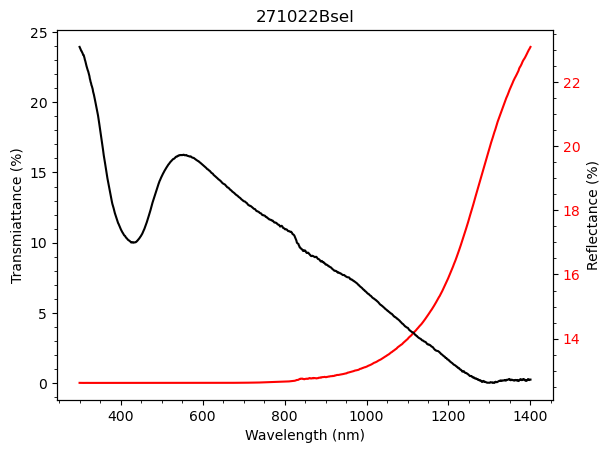

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(df_data['Wavelength (nm)'], df_data['T (%)'], label='Transmittance', color='red')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Transmiattance (%)')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax2 = ax1.twinx()
ax2.plot(df_data['Wavelength (nm)'], df_data['R (%)'], label='Reflectance', color='k')
ax2.set_ylabel('Reflectance (%)')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.title(file_title)

# Figure Save settings 
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'T and R plot.png'), dpi=300)

## Absorptance Spectra

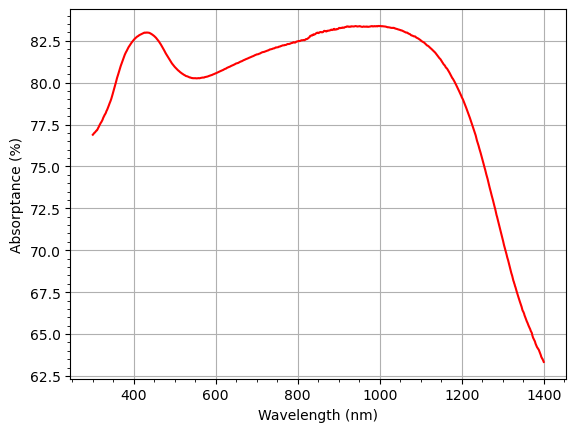

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(df_data['Wavelength (nm)'], df_data['Absorptance (%)'], label='Absorptance', color='red')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorptance (%)')
ax1.grid()
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Figure Save settings 
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'Absorptance plot.png'), dpi=300)

## Absorbance Spectra

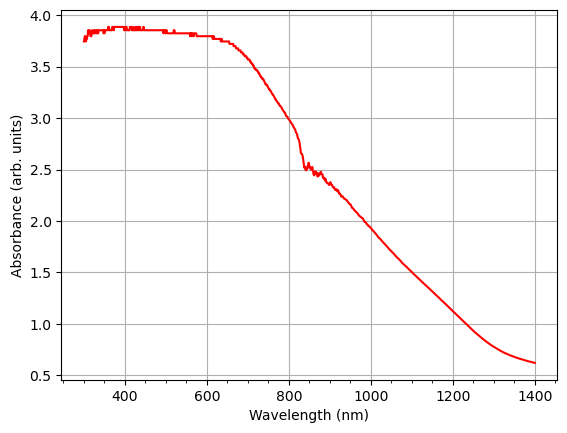

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(df_data['Wavelength (nm)'], df_data['Absorbance (%)'], label='Absorbance', color='red')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Absorbance (arb. units)')
ax1.grid()
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Figure Save settings 
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'Absorbance plot.png'), dpi=300)

## Refractive Index ($n$) & Extinction coefficient ($k$)

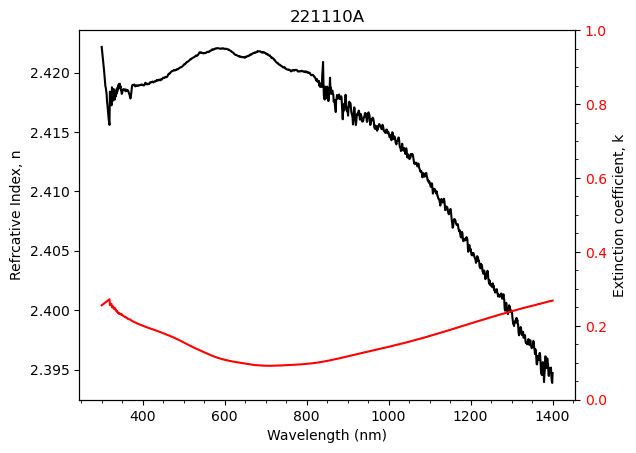

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(df_data['Wavelength (nm)'], df_data['n'], label='Refrcative Index', color='k')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Refrcative Index, n')

ax2 = ax1.twinx()
ax2.plot(df_data['Wavelength (nm)'], df_data['k'], label='Extinction coefficient', color='red')
ax2.set_ylabel('Extinction coefficient, k')
ax2.tick_params(axis='y', labelcolor='red')
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax2.set_ylim(0,1)
plt.title(file_title)

# Figure save settings
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'n k plot.png'), dpi=300)

## Tauc $\alpha h \nu^2$ Plot

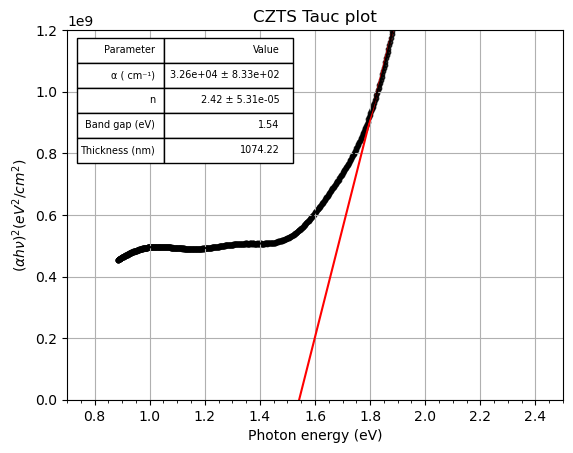

In [19]:
def linear_fit(x_min, x_max, hv_series, ahv2_series):
    hv_series = np.nan_to_num(hv_series, nan=0.0, copy=False).astype(float)
    ahv2_series = np.nan_to_num(ahv2_series, nan=0.0, copy=False).astype(float)

    mask = np.logical_and(hv_series >= x_min, hv_series <= x_max) # a mask based on the condition for x_min and x_max
    hv_subset = hv_series[mask]
    ahv2_subset = ahv2_series[mask]

    # Fit line of best fit
    coefficients = np.polyfit(hv_subset, ahv2_subset, 1)
    poly_func = np.poly1d(coefficients)

    # Generate x values for the line
    line_x = np.linspace(x_min - 1, x_max + 0.5, 100)

    # Calculate y values for the line
    line_y = poly_func(line_x)

    # Calculate x-axis intercept
    x_intercept = -coefficients[1] / coefficients[0]

    return x_intercept, line_y, line_x

x_intercept, line_y, line_x = linear_fit(1.8, 1.9, df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'])

### Tauc Plot figure ###
fig, ax = plt.subplots()

# Plot line of best fit
ax.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax.plot(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], color='k')
ax.scatter(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], label='Tauc plot', c='k', marker='o', alpha=0.8, s=10)

# Plot X intercept
#ax.plot(x_intercept, 0, 'ro')
ax.set_xlabel('Photon energy (eV)')
ax.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
ax.set_xlim(0.7, 2.5)  # Set x-axis limits Selenise
ax.set_ylim(0, 1.2E9) # Set y-axis limits Selenise
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5E13))
ax.grid()
#ax.legend()
plt.title('CZTS' + ' Tauc plot')

# Add Egap as text onto the figure
# ax.text(0.4, 0.1, "Band gap : {:.2f} eV".format(x_intercept), 
#         transform=ax.transAxes, fontsize=10, position=(0.55, 0.05))

# Add a table with parameters
table_data = [
    ['Parameter', 'Value'],
    ["α ( cm⁻¹)", "{:.2e} ± {:.2e}".format(alpha_visible, alpha_sem)],
    ["n", "{:.2f} ± {:.2e}".format(n_visible, n_sem)],
    ["Band gap (eV)", "{:.2f}".format(x_intercept)],
    ["Thickness (nm)", "{:.2f}".format(t*10000000)]
]

table = plt.table(cellText=table_data, colWidths=[0.35, 0.52], loc='upper left')
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(0.5, 1.5)
table.set_zorder(10)

# Figure save settings
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'Tauc plot.png'), dpi=300)

In [ ]:
### Tauc Plot figure ###
fig, ax = plt.subplots()

x_intercept, line_y, line_x = linear_fit(1.9, 2, df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'])

# Plot line of best fit
ax.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax.plot(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], color='k')
ax.scatter(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], label='Tauc plot', c='k', marker='o', alpha=0.8, s=10)

# Plot X intercept
#ax.plot(x_intercept, 0, 'ro')
ax.set_xlabel('Photon energy (eV)')
ax.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
ax.set_xlim(0.7, 2.5)  # Set x-axis limits Selenise
ax.set_ylim(0, 0.2E10) # Set y-axis limits Selenise
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05E13))
ax.grid()
#ax.legend()
#plt.title(file_title + ' Tauc plot')

# Add a table with parameters
table_data = [
    ['Parameter', 'Value'],
    ["α ( cm⁻¹)", "{:.2e} ± {:.2e}".format(alpha_visible, alpha_sem)],
    ["n", "{:.2f} ± {:.2e}".format(n_visible, n_sem)],
    ["Band gap (eV)", "{:.2f}".format(x_intercept)],
    ["Thickness (nm)", "{:.2f}".format(t*10000000)]
]

table = plt.table(cellText=table_data, colWidths=[0.35, 0.52], loc='upper left')
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(0.5, 1.5)
table.set_zorder(10)

# Create a second axes for the additional plot in the top right corner
ax2 = fig.add_axes([0.68, 0.65, 0.3, 0.3])  # Adjust the position and size as needed

ax2.set_xlabel('Photon energy (eV)')
ax2.set_ylabel('$(\\alpha h\\nu)^2 (eV^2/cm^2)$')
#ax2.set_xlim(0.6, 3)  # Set x-axis limits nanoparticles
#ax2.set_ylim(-0.1E13, 2E14) # Set y-axis limits nanoparticles
ax2.set_xlim(0.6, 4.5)  # Set x-axis limits Selenise
ax2.set_ylim(-0.0, 2E11) # Set y-axis limits Selenise
#ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05E13))
# Plot line of best fit
ax2.plot(line_x, line_y, label='Tangent', color='r')
# Plot Tauc plot
ax2.plot(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], color='k')
ax2.scatter(df_data['h$\nu$'], df_data['$(\\alpha h\\nu)^2 (eV^2/cm^2)$'], label='Tauc plot', c='k', marker='o', alpha=0.8, s=2)
ax2.grid()

# Add Egap as text onto the figure
#ax.text(0.4, 0.1, "Band gap : {:.2f} eV".format(x_intercept), 
#         transform=ax.transAxes, fontsize=10, position=(0.55, 0.05))

# Figure save settings
save_dir = os.path.join(folder_path, 'UVVIS Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, file_title + 'Tauc plot2.png'), dpi=300)